In [52]:
print ("Om Vakraduntaya Namah")

Om Vakraduntaya Namah


# Customer Churn Modelling

### Workflow:

Data Wrangling:  The process of transforming raw data to a clean organized format ready for use.

 - Inspection of data
 - Isolate/Discard model features
 - Check feature data types
 - Convert any strings to integers for modelling
 - Data imputation
 - Outliers and distributions
 
 
Exploratory Data Analysis:

 - Correlation Matrix
 - Heatmap
 - Feature importance by Random Forest classifier (mean difference in impurity analysis)
 - Data discretitisation (to break up a  numerical feature into discrete bins) and visualisation with Seaborn
 - Customer segmentation and intervention strategies
 
Predictive Modelling:
 
 - Logistic Regression
 - Decision Tree
 - Random Forest
 - Gradient Boosting
 - SVM
 - KNN 
 - Neural Network

# Introduction

In this notebook, customer churn will be explored, visualised and modelled. This type of analysis is valuable in a number of ways. Firstly, due to rapid developments in technology, unique products and services are becoming commoditised faster than ever before, thus, markets are reaching new levels of efficiency and facing higher levels of competition. Furthermore, as technology continues to develop, the tools employed in enacting the 4 p’s of marketing (product, promotion, placement, and price) are increasingly becoming both digitised and democratised across a large number of consumers. This digitisation and democratisation is shifting the balance of power from firms to consumers. As a result, firms are losing control over the marketing mix and consumers are taking on more active and expansive roles across various marketing activities. 

In parallel to these developments, firms have acquired more data on their customers than at any other point in history, giving them the capacity to understand their customers with a level of granularity that was previously not possible. 

Finally, from a growth perspective, focusing on customer retention rather than just customer accquisition offers another lever for companies to pull when attempting to optimise their growth targets.

For the preceding reasons, moving beyond traditional product centric approaches to marketing, and adopting more customer centric strategies has the capacity to give companies the necessary edge in todays hyper competitive market place. This analysis will explore this idea further.

The data files state that the data is "artificial and based on claims similar to the real world".

# Import all the necessary packages 

In [28]:
! pip install scikit-learn==0.22

     |████████████████████████████████| 7.0MB 42kB/s  eta 0:00:01     |█████████████████████████▋      | 5.6MB 1.4MB/s eta 0:00:01     |██████████████████████████████▊ | 6.7MB 1.4MB/s eta 0:00:01
     |████████████████████████████████| 296kB 8.2MB/s eta 0:00:01     |███████████████████████████████▏| 286kB 8.2MB/s eta 0:00:01
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
! pip install imblearn

In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.4.5.
The scikit-learn version is 0.23.2.


In [53]:
#set a global random seed for reproducability
#import random
#random.seed(23521)

# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Model & Traditional Model Eval
from sklearn import neural_network
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix, log_loss


# Resampling Methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours, TomekLinks # NearMiss2 belongs to the 
# family of under sampling methods used to address the imbalanced class problem.
#from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import Pipeline


In [7]:
! ls -ltr /home/nbuser/library/pychurn.csv

-rw-r--r-- 1 nbuser nbuser 172225 May 31 10:52 /home/nbuser/library/pychurn.csv


In [54]:
df = pd.read_csv('d:/dat1/pychurn.csv')
df.head(2)   # head(df,2)/home/nbuser/project/pychurn.csv

# /home/nbuser/project/pychurn.csv'

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,2,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


In [21]:
! pwd

/home/nbuser/library


In [4]:
df.size
df.shape

(1840, 19)

In [5]:
df.describe()

,Unnamed: 0,account.length,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls
count,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000,1840.000000
mean,920.500000,99.652717,8.540761,180.179402,100.269565,30.631027,200.407065,100.209239,17.034793,200.219022,100.450543,9.009918,10.208043,4.499457,2.756707,1.542935
std,531.306566,39.937792,14.007901,54.049201,19.999379,9.188340,51.226070,19.827786,4.354181,51.376336,19.565585,2.311955,2.797393,2.501549,0.755324,1.304739
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.200000,12.000000,2.650000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,460.750000,73.000000,0.000000,145.000000,87.000000,24.650000,165.900000,87.000000,14.100000,166.975000,87.000000,7.517500,8.400000,3.000000,2.270000,1.000000
50%,920.500000,98.500000,0.000000,180.800000,100.500000,30.735000,202.250000,101.000000,17.195000,200.650000,101.000000,9.030000,10.200000,4.000000,2.750000,1.000000
75%,1380.250000,127.000000,21.250000,216.800000,113.000000,36.860000,234.550000,114.000000,19.935000,236.425000,114.000000,10.640000,12.000000,6.000000,3.240000,2.000000
max,1840.000000,243.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,381.900000,175.000000,17.190000,20.000000,19.000000,5.400000,9.000000


In [6]:
df.dtypes

Unnamed: 0                         int64
account.length                     int64
international.plan                object
voice.mail.plan                   object
number.vmail.messages              int64
total.day.minutes                float64
total.day.calls                    int64
total.day.charge                 float64
total.eve.minutes                float64
total.eve.calls                    int64
total.eve.charge                 float64
total.night.minutes              float64
total.night.calls                  int64
total.night.charge               float64
total.intl.minutes               float64
total.intl.calls                   int64
total.intl.charge                float64
number.customer.service.calls      int64
churn                             object
dtype: object

In [8]:
df['churn'].value_counts()

 False.    1603
 True.      237
Name: churn, dtype: int64

In [9]:
237/float(1603) * 100

14.784778540237056

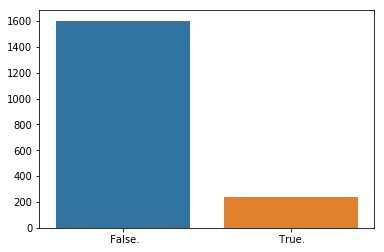

In [10]:
s = df['churn'].value_counts()
sns.barplot(s.index, s.values)

# Data Preprocessing

## 1. Converting Strings to Numerical Values

In [55]:
df_2 = df.select_dtypes(include = [object])
df_2.head(2)

,international.plan,voice.mail.plan,churn
0,no,yes,False.
1,no,yes,False.


In [56]:
intl_plan=df.groupby("international.plan").size()
print(intl_plan)
VMail_Plan=df.groupby('voice.mail.plan').size()
print(VMail_Plan)

international.plan
 no     1660
 yes     180
dtype: int64
voice.mail.plan
 no     1310
 yes     530
dtype: int64


In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_3 = df_2.apply(le.fit_transform)
df_3.head(5)

,international.plan,voice.mail.plan,churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


In [58]:
intl_plan=df.groupby("international.plan").size()
print(intl_plan)
VMail_Plan=df.groupby('voice.mail.plan').size()
print(VMail_Plan)

international.plan
 no     1660
 yes     180
dtype: int64
voice.mail.plan
 no     1310
 yes     530
dtype: int64


In [59]:
cols = df_3.columns
for x in cols:
    df[x] = df_3[x]
df.head(5)  

,Unnamed: 0,account.length,international.plan,voice.mail.plan,number.vmail.messages,total.day.minutes,total.day.calls,total.day.charge,total.eve.minutes,total.eve.calls,total.eve.charge,total.night.minutes,total.night.calls,total.night.charge,total.intl.minutes,total.intl.calls,total.intl.charge,number.customer.service.calls,churn
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,3,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,4,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,5,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


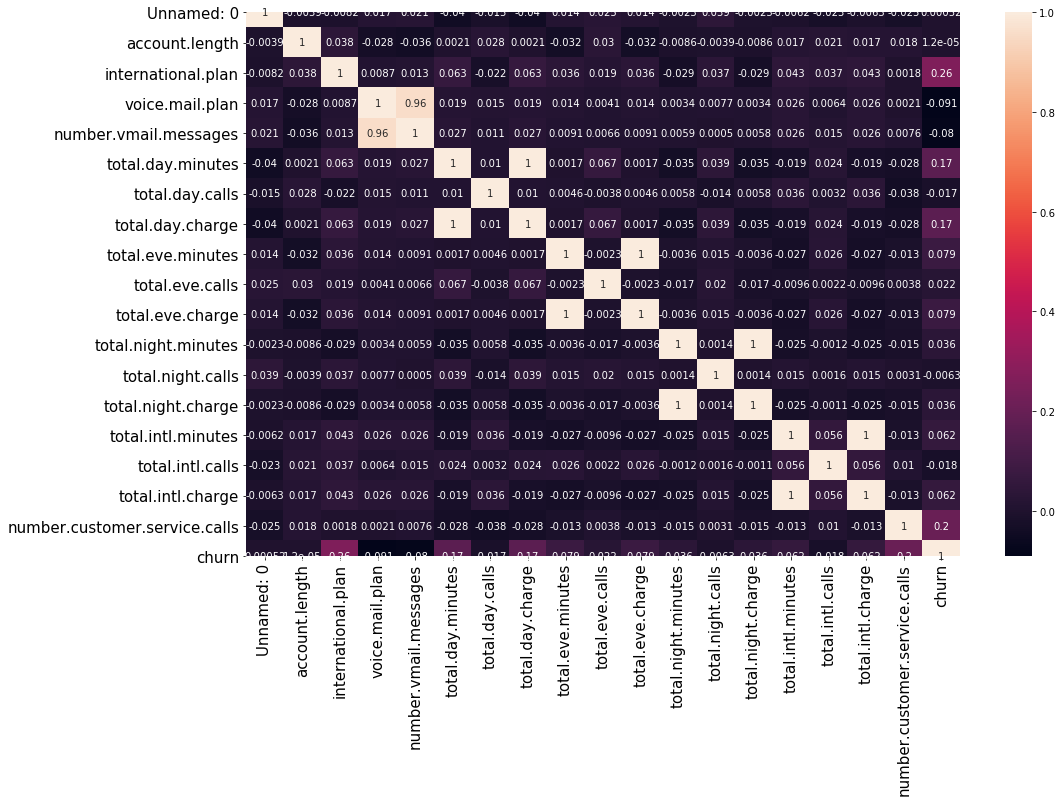

In [60]:
corr = df.corr()
plt.figure(figsize=(16,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
sns.heatmap(corr,annot=True)
#sns.title('Heatmap of Feature Correlations', fontsize = 20)

In [11]:
churn_corr = pd.DataFrame(corr['churn'].drop('churn'))
churn_corr.sort_values(by = 'churn', ascending = False) # moving our target value to the left for ease of analysis

,churn
international.plan,0.261128
number.customer.service.calls,0.204388
total.day.minutes,0.168015
total.day.charge,0.168013
total.eve.minutes,0.079271
total.eve.charge,0.079254
total.intl.charge,0.062073
total.intl.minutes,0.061954
total.night.charge,0.035932
total.night.minutes,0.035905


In [62]:
x = df.drop('churn', axis=1)
y = df['churn']   

## 2. Split train and test data set 
* To avoid over-fitting, we will divide our dataset into training and test splits.
   The training data will be used to train the logistic regression and the test data will be used to evaluate 
   the performance of the neural network. 
   
* This helps with the problem of identifying over-fitting because we're evaluating our log. reg. on data that it has not seen (i.e. been 
  trained on) before.

In [63]:
from sklearn.model_selection import train_test_split
inpfeat_train,inpfeat_test,label_train,label_test = train_test_split(x,y,test_size=0.35,random_state=42)

# random_state: If you use random_state = some_number, then you can guarantee that your split will
# be always the same. This is useful if you want reproducible results, for example in testing for consistency 
# in the documentation (so that everybody can see the same numbers).

# Fit the Logistic Regression Model

In [64]:
# n_jobs = -1 , use all cores
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
log = LogisticRegression()
log.fit(inpfeat_train,label_train) 
# In R, glm(dependent variable y ~ . , data=train, family='binomial')

LogisticRegression()

In [65]:
y_pred_class = log.predict(inpfeat_test).astype(float) # in R, predict(fit, newdata=test) , predict(log,newdata=inpfeat_test,type='response')
y_pred_class
#print (inpfeat_test.shape)
#print (df.shape)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [66]:
y_pred_prob = log.predict_proba(inpfeat_test)
print (y_pred_prob[0:4])
y_pred_prob = log.predict_proba(inpfeat_test)[:,1]
print (y_pred_prob[0:4])

[[0.94025746 0.05974254]
 [0.94550238 0.05449762]
 [0.91450613 0.08549387]
 [0.85162349 0.14837651]]
[0.05974254 0.05449762 0.08549387 0.14837651]


In [20]:
loss = log_loss(label_test, y_pred_prob)
print ('Log loss is ', loss)
print ('Log loss / Cross Entnopy = {:4f}'.format(loss))

# 1/n   yi log(yi) + (1-yi) log(1-yi)
'''
yi = 1 , pi = 1 
yi = 0, pi is low 
yi = 1, pi is low  
yi = 0, pi is high    
'''

Log loss is  0.33539453421460536
Log loss / Cross Entnopy = 0.335395


'\nyi = 1 , pi = 1 \nyi = 0, pi is low \nyi = 1, pi is low  \nyi = 0, pi is high    \n'

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(label_test,log.predict(inpfeat_test).astype(int))

0.8711180124223602

In [22]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(label_test,log.predict(inpfeat_test))
confusion = confusion_matrix(label_test,y_pred_class)
print(confusion)

[[557   8]
 [ 75   4]]


In [23]:
print (label_test.value_counts())
print (7/59)  # 52 is FN

0    565
1     79
Name: churn, dtype: int64
0.11864406779661017


## Model Evaluation

In [67]:
from sklearn.metrics import precision_score
# Sensitivity
TP= confusion[1,1]
print('True Positive' , TP)
TN=confusion[0,0]
print('True Negative',TN)
FP=confusion[0,1]
print ('False Positive', FP)
FN=confusion[1,0]
print ('False Negative',FN)
print ("\n")
print ("Accuracy ", (TP+TN)/(TP+TN+FP+FN))
print ("\n")
print ("TPR/Sensitivity/Recall ", TP/(TP+FN)) # When the actual value is +ve, how often is the prediction correct ? 
print ("\n")
print ("Sepcificity ", TN/ float(TN+FP)) # When the actual value is -ve, how often is the prediction correct ?  Specificity
print ("\n")
print ("Precision ", TP/(TP+FP))   # when a postive value is predicted, how often is the prediction correct ?
print ("Precision score", precision_score(label_test,y_pred_class))  # Churn is the positive class

True Positive 207
True Negative 189
False Positive 133
False Negative 113


Accuracy  0.616822429906542


TPR/Sensitivity/Recall  0.646875


Sepcificity  0.5869565217391305


Precision  0.6088235294117647
Precision score 0.3333333333333333


In [68]:
from sklearn.metrics import classification_report
print(classification_report(label_test,y_pred_class)) 
# Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       565
           1       0.33      0.05      0.09        79

    accuracy                           0.87       644
   macro avg       0.61      0.52      0.51       644
weighted avg       0.81      0.87      0.83       644



**As expected, our model is assuming at most observations are *churn*. 
So it is performing the same as our baseline. Below is a report that shows the recall scores for the baseline model. 
For the purposes of this project, we will attempt to increase the recall for the *churn* class**

#  K Fold Cross Validation

In [47]:
from sklearn.model_selection import KFold, cross_val_score
#from sklearn import cross_validation
k_fold = KFold(n_splits=5)
score2 = cross_val_score(log,x,y,cv=k_fold,n_jobs=-1)  
#score2 = cross_validation.cross_val_score(log,x,y,cv=5)
score3 = cross_val_score(log,x,y,cv=5, scoring='roc_auc')
#score3 = cross_validation.cross_val_score(log,x,y,cv=5, scoring='roc_auc').mean()
print ('score3 is ' + str(score3))
print("logistic regressioon cross validated : mean="+str(np.mean(score2))+ " std=" + str(np.std(score2)))

score3 is [0.65208458 0.69092596 0.70040432 0.70221354 0.69140625]
logistic regressioon cross validated : mean=0.8706521739130434 std=0.007002227568872365


In [31]:
logit_score_train = log.score(inpfeat_train,label_train)
print ('Model Score on Training data set', logit_score_train)

Model Score on Training data set 0.8760869565217392


In [32]:
logit_score_test = log.score(inpfeat_test,label_test)
print ('Model Score on Training data set', logit_score_test)

Model Score on Training data set 0.8717391304347826


In [33]:
from sklearn.metrics import roc_auc_score
logit_auc_train = roc_auc_score(label_train,log.predict(inpfeat_train))
logit_auc_test = roc_auc_score(label_test,log.predict(inpfeat_test))
print ('Auc on  Training data set', ',',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Auc on  Training data set , 0.5651302136887958
Auc on  Test data set 0.5505938543471829


In [34]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(label_test,log.predict(inpfeat_test)))

[[394   7]
 [ 52   7]]


from sklearn import metrics
print (metrics.accuracy_score(inpfeat_test,y_pred_class ))

## Feature Selection

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(log,8)
r1 = rfe.fit(x,y)
print (r1)
print(r1.support_)
print(r1.ranking_)
print(r1.n_features_)
#print("Num Features: %d") % r1.n_features_
#print("Selected Features: ") % r1.support_
#print("Feature Ranking: %s") % r1.ranking_

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=8, step=1, verbose=0)
[False False  True  True False False False False False False  True False
 False  True  True  True  True  True]
[11  9  1  1  6  3  4  5  7  8  1 10  2  1  1  1  1  1]
8


In [36]:
print (inpfeat_train.columns)

Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls'],
      dtype='object')


In [107]:
print (rfe)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=8, step=1, verbose=0)


## Model Selection

In [13]:
logit_auc_train = roc_auc_score(label_train,log.predict(inpfeat_train))
logit_auc_test = roc_auc_score(label_test,log.predict(inpfeat_test))
print ('Auc on  Training data set', ',',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

#rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto')
rfc = RandomForestClassifier()
rfc.fit(inpfeat_train, label_train)
rf_auc_train = roc_auc_score(label_train,log.predict(inpfeat_train))


NameError: name 'roc_auc_score' is not defined

# Handling Imbalanced data set

In [29]:
! pip install imblearn

     |████████████████████████████████| 163kB 4.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
#! pip install base

  Created wheel for base: filename=base-1.0.4-cp35-none-any.whl size=4156 sha256=a2ed2382f1e0bca19a8c7e311f028285e7a020748c5b45865782283c6698c867
  Stored in directory: /home/nbuser/.cache/pip/wheels/25/2e/69/eb09792bfb1a58d03a1b9cb8f24a4e16b9ea9c62bdb4f95a26
Successfully built base
You should consider upgrading via the 'pip install --upgrade pip' command.


In [48]:
import imblearn

<a></a>
# SMOTE

Instead of oversampling with random replacement, we can oversample our minority classes with Synthetic Minority Oversampling TEchnique (SMOTE). While sklearn resample randomly replicates samples that exist in the dataset, SMOTE creates new samples based on interpolation. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors 
![](smote.png)

Considering a sample $x_i$, a new sample $x_{new}$ will be generated considering its k neareast-neighbors (corresponding to k_neighbors). For instance, the 3 nearest-neighbors are included in the blue circle as illustrated in the figure below. Then, one of these nearest-neighbors $x_{zi}$ is selected and a sample is generated as followswhere $\lambda$ is a random number in the range [0, 1]:

$$x_{new} = x_i + \lambda \times (x_{zi} - x_i)$$


SMOTE allows us to balance our data-set without as much overfitting, as we create new synthetic examples rather than using duplicates. This however does not prevent all overfitting, as these are still created from existing data points. SMOTE will create enough synthetic samples so that there are the same number of samples in each class

In [28]:
# conda install imblearn
from imblearn.over_sampling import SMOTE

In [29]:
# SMOTE(random_state=42)
X_resample, y_resample = SMOTE().fit_sample(x, y)
print(df['churn'].value_counts())

0    1603
1     237
Name: churn, dtype: int64


In [33]:
df.churn.value_counts()
1603 * 2

3206

In [94]:
print ('The number of transactions after resampling : ' + str(len(X_resample)))
print ('If the number of Churners is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

The number of transactions after resampling : 3206
If the number of Churners is equal to the number of normal tansactions? True


In [35]:
yy= pd.DataFrame(y_resample)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)

In [31]:
# n_jobs = -1 , use all cores
# n_jobs = 1 ,use only one core
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [32]:
LogisticRegressionCV()
logit_score_train = log.score(X_train,y_train)
print ('Model Score on Training data set', logit_score_train)
logit_score_test = log.score(X_test,y_test)
print ('Model Score on Training data set', logit_score_test)

Model Score on Training data set 0.6505460218408736
Model Score on Training data set 0.616822429906542


In [33]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,log.predict(X_test))
#confusion = confusion_matrix(label_test,y_pred_class)
print(confusion)

[[189 133]
 [113 207]]


In [34]:
smote_confusion = pd.DataFrame(np.array(confusion_matrix(y_test,log.predict(X_test))),
                         index = ['is_not_churn (0)', 'is_churnn (1)'],
                        columns=['predicted_not_churn (0)','predicted_churn (1)'])
smote_confusion

,predicted_not_churn (0),predicted_churn (1)
is_not_churn (0),189,133
is_churnn (1),113,207


In [35]:
# Sensitivity
TP= confusion[1,1]
print('True Positive' , TP)           
TN=confusion[0,0]
print('True Negative',TN)
FP=confusion[0,1]
print ('False Positive', FP)
FN=confusion[1,0]
print ('False Negative',FN)
print ("\n")
print ("Accuracy ", (TP+TN)/(TP+TN+FP+FN))
print ("\n")
print ("TPR/Sensitivity/Recall ", TP/(TP+FN)) # When the actual value is +ve, how often is the prediction correct ? 
print ("\n")
print ("Sepcificity ", TN/ float(TN+FP)) # When the actual value is -ve, how often is the prediction correct ?  Specificity
print ("\n")
print ("Precision ", TP/(TP+FP))   # when a postive value is predicted, how often is the prediction correct ?
#print ("Precision score", precision_score(y_test,log.predict(X_test)))  # Churn is the positive class

True Positive 207
True Negative 189
False Positive 133
False Negative 113


Accuracy  0.616822429906542


TPR/Sensitivity/Recall  0.646875


Sepcificity  0.5869565217391305


Precision  0.6088235294117647


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log.predict(X_test)) )
# Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
# The support is the number of samples of the true response that lie in that class.
# The support is the number of occurrences of each class in y_true.

# The scores corresponding to every class will tell you the accuracy of
# the classifier in classifying the data points in that particular class
# compared to all other classes.


              precision    recall  f1-score   support

           0       0.63      0.59      0.61       322
           1       0.61      0.65      0.63       320

    accuracy                           0.62       642
   macro avg       0.62      0.62      0.62       642
weighted avg       0.62      0.62      0.62       642



# SMOTEENN
---
SMOTEEN is a class that performs over-sampling using SMOTE and cleaning using Edited Nearest Neighbors (ENN). ENN is an undersampling technique that removes examples whose class label differs from the class of k nearest neighbors. To keep the sample in the dataset, its neighbors need to belong to the same class.

**NOTE**:  
In the newest version of the imbalanced learn package, both k (the number of neighbours to used to construct synthetic samples) and m (the number of neighbours to use to determine if a minority sample is in danger) have been deprecated. They are now included in the smote parameter. The default for this is the default SMOTE with no hyperparameters specified. The hyperparameter n_neighbors (the size of the neighborhood to consider to compute the average distance to the minority point samples) has also been deprecated and is included in the ENN parameter.

In [39]:
y_train

1277    0
1722    0
2382    1
303     0
1311    0
       ..
968     1
3000    1
1667    0
1688    0
1898    1
Name: churn, Length: 2564, dtype: int32

In [41]:
# enn = EditedNearestNeighbours(n_neighbors=3)
smeen = SMOTEENN(smote= SMOTE(k_neighbors=5), 
                 enn=EditedNearestNeighbours( n_neighbors=25),
                 random_state=1271)
X_smeen, y_smeen = smeen.fit_sample(X_train, y_train)

In [42]:
y_smeen.unique()

array([0, 1], dtype=int64)

In [43]:
log.fit(X_smeen,y_smeen)
smeen_predict = log.predict(X_test)
smeen_score = recall_score(y_test, smeen_predict)

print ("SMOTEENN Test Score:", smeen_score)

SMOTEENN Test Score: 0.028125


In [44]:
smeen_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, smeen_predict)),
                         index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
smeen_confusion

,predicted_not_abnormal,predicted_abnormal
is_not_abnormal,319,3
is_abnormal,311,9


## SMOTETomek
---

Similar to SMOTEENN, SMOTETomek is also a class that uses a combination of over and under-sampling. SMOTETomek is an undersampling techniques that uses Tomek links to determine which observations to remove. A Tomek link exists if the two samples are nearer to each other than to samples from their own class.  

A Tomek’s link between two samples of different class x and y is defined such that there is no example z such that:

$$d(x, y) &lt; d(x, z) \text{ or } d(y, z) &lt; d(x, y)$$

where d is the distance between the two samples

In [45]:
smomek = SMOTETomek(
                    smote = SMOTE(k_neighbors = 35),
                    tomek = TomekLinks())

X_smomek, y_smomek = smomek.fit_sample(X_train, y_train)

In [46]:
log.fit(X_smomek,y_smomek)
smomek_predict = log.predict(X_test)
smomek_score = recall_score(y_test, smomek_predict)

print ("SMOTETomek Test Score:", smomek_score)

SMOTETomek Test Score: 0.621875


In [47]:
smomek_confusion = pd.DataFrame(np.array(confusion_matrix(y_test, smomek_predict)),
                         index = ['is_not_abnormal', 'is_abnormal'],
                        columns=['predicted_not_abnormal','predicted_abnormal'])
smomek_confusion

,predicted_not_abnormal,predicted_abnormal
is_not_abnormal,195,127
is_abnormal,121,199


In [48]:
print(classification_report(y_test,log.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.62      0.61      0.61       322
           1       0.61      0.62      0.62       320

    accuracy                           0.61       642
   macro avg       0.61      0.61      0.61       642
weighted avg       0.61      0.61      0.61       642



In [104]:
from sklearn.metrics import roc_auc_score
logit_auc_train = roc_auc_score(y_train,log.predict(X_train))
logit_auc_test = roc_auc_score(y_test,log.predict(X_test))
print ('Auc on  Training data set', ',',logit_auc_train)
print ('Auc on  Test data set', logit_auc_test)

Auc on  Training data set , 0.6766601380084125
Auc on  Test data set 0.6668090062111802


In [105]:
def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_test, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()    

In [50]:
plot_confusion_matrix(log, X_test, y_test, annot=True)

NameError: name 'plot_confusion_matrix' is not defined

0.6137325310559006


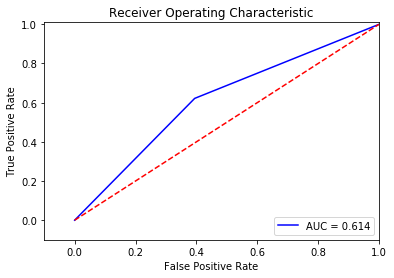

In [49]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

fpr, tpr, thresholds = roc_curve(y_test, log.predict(X_test))

roc_auc = auc(fpr,tpr)
print(roc_auc)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(inpfeat_train,label_train)

DecisionTreeClassifier()

In [51]:
dt_score_train = dtree.score(inpfeat_train, label_train)
dt_score_test = dtree.score(inpfeat_test, label_test)
print (dt_score_train)
print (dt_score_test)
dt_auc_score_train = roc_auc_score(label_train, dtree.predict(inpfeat_train))
dt_auc_score_test = roc_auc_score(label_test, dtree.predict(inpfeat_test))
print (dt_auc_score_train)
print (dt_auc_score_test)

1.0
0.8866459627329193
1.0
0.7775176431051866


In [53]:
! pip install pydotplus

     |████████████████████████████████| 286kB 2.2MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp35-none-any.whl size=25388 sha256=3702f1ec6da4339172dabcd92254b41db9e9d22a25ccab2051c2b55fd2738c33
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.


In [54]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

In [55]:
inpfeat_train.columns

Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls'],
      dtype='object')

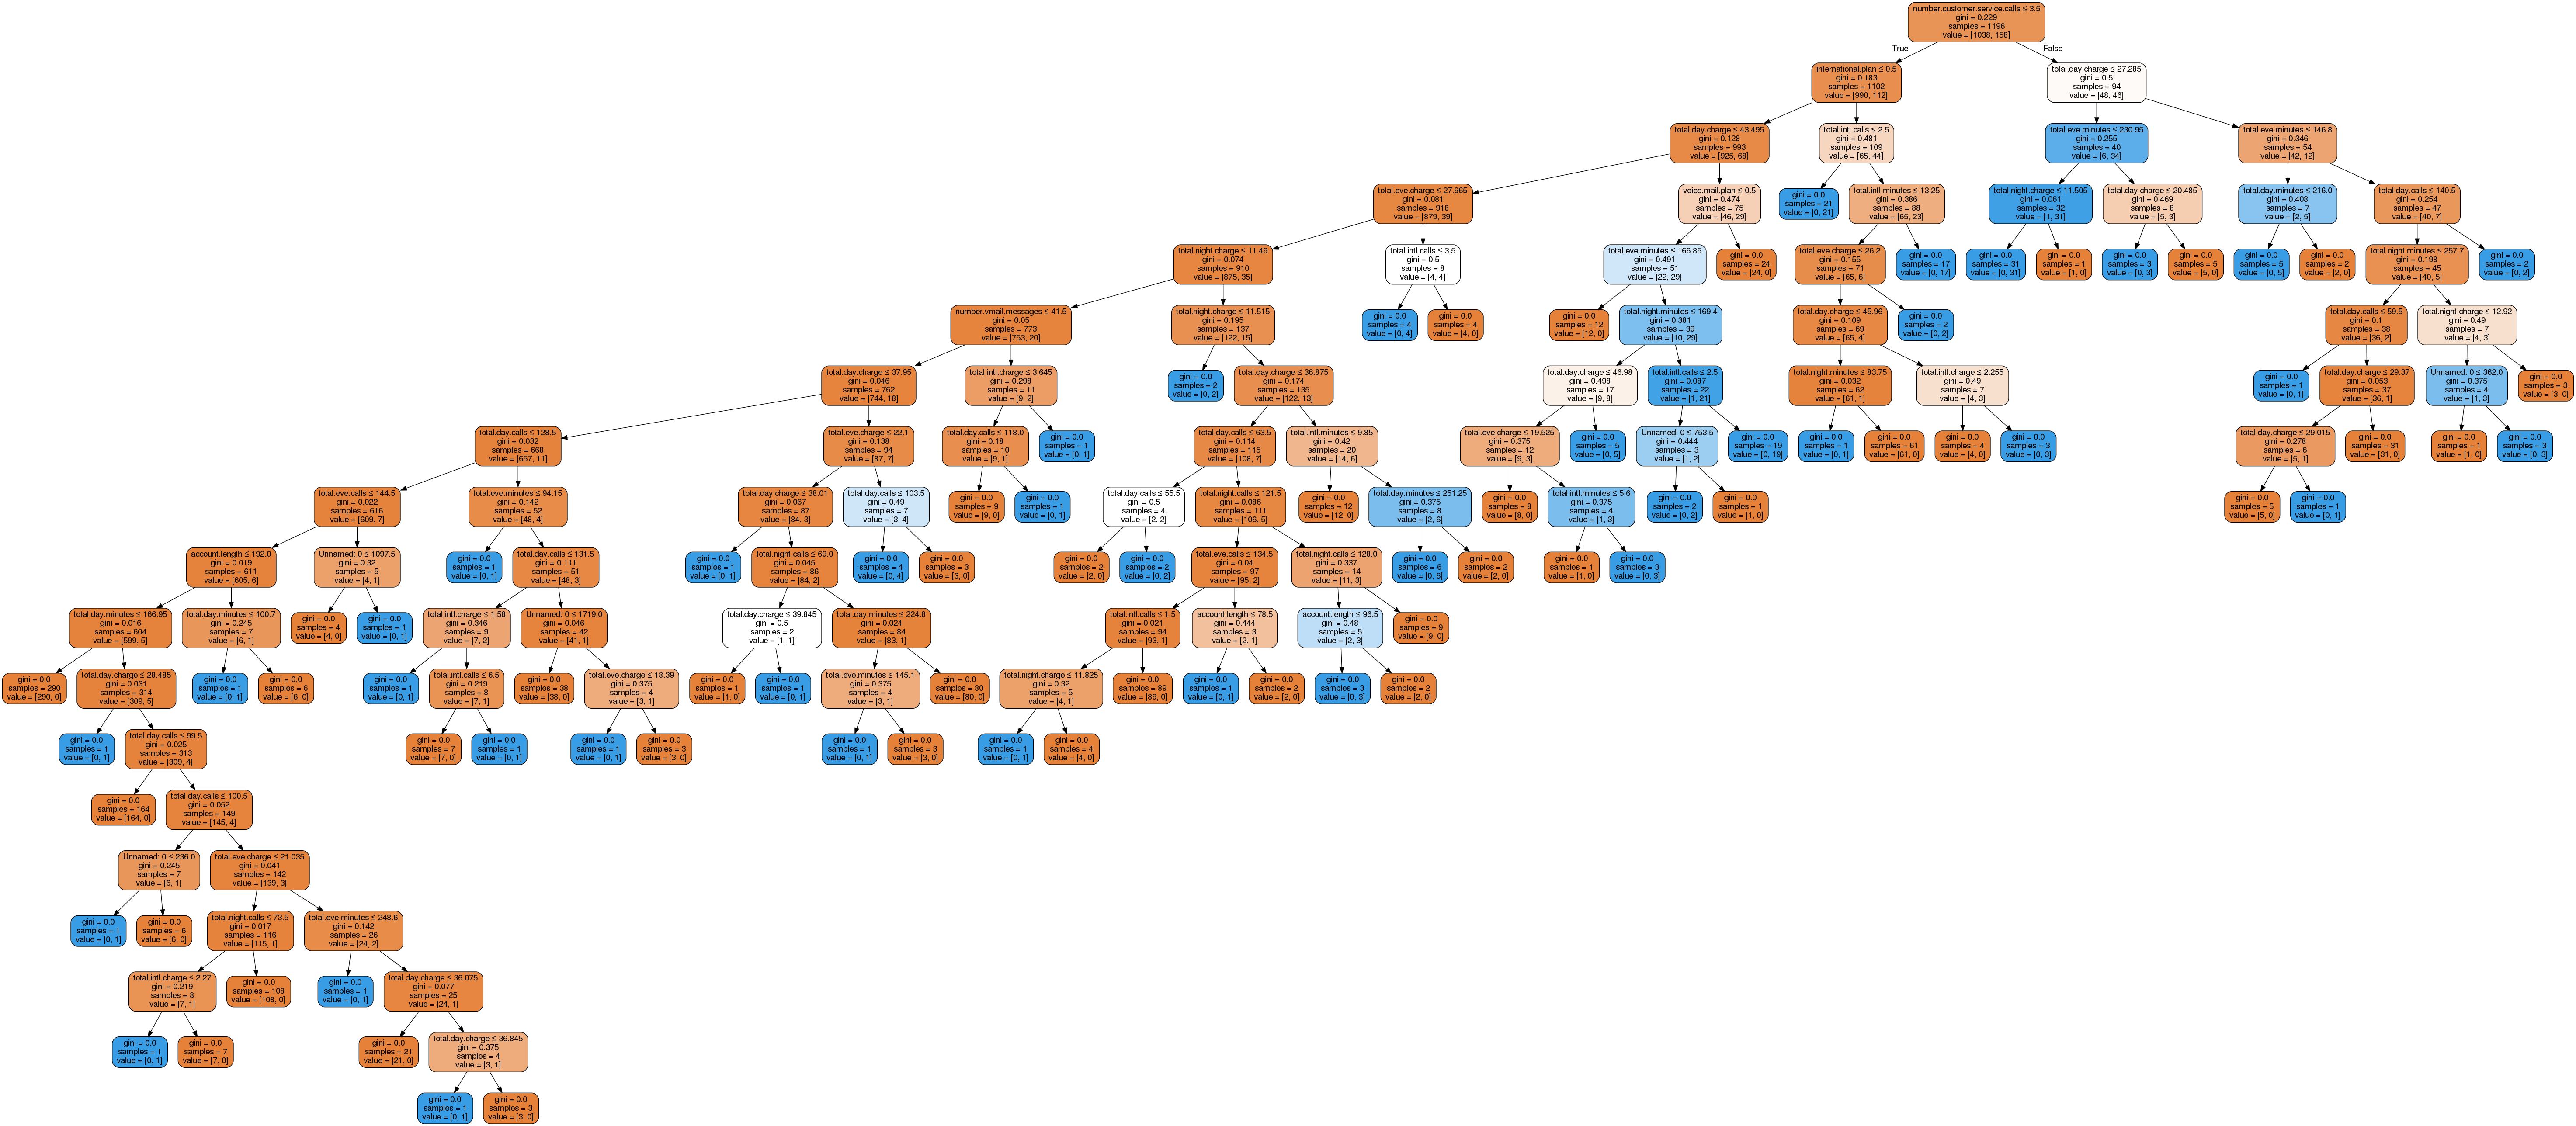

In [56]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

dot_data = StringIO()
''' dtr_best was previously defined'''
tree.export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=inpfeat_train.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [59]:
# n_estimators sets the number of trees to construct , defalts to 10 
# max_features  sets the number of features to consider at each node.  Defaults to p features, where p is the 
# totalnumber of features 
# bootstrap sets whether or not to sample with replacement, defaults to True


#rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto')
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(inpfeat_train, label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

## how to print random forest trees

In [60]:
from sklearn import tree
i_tree = 0
for tree_in_forest in rfc.estimators_:
    with open('D:/dat1/tree_' + str(i_tree) + '.dot', 'w') as my_file:
        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
    i_tree = i_tree + 1

FileNotFoundError: [Errno 2] No such file or directory: 'D:/dat1/tree_0.dot'

In [61]:
df.columns

Index(['Unnamed: 0', 'account.length', 'international.plan', 'voice.mail.plan',
       'number.vmail.messages', 'total.day.minutes', 'total.day.calls',
       'total.day.charge', 'total.eve.minutes', 'total.eve.calls',
       'total.eve.charge', 'total.night.minutes', 'total.night.calls',
       'total.night.charge', 'total.intl.minutes', 'total.intl.calls',
       'total.intl.charge', 'number.customer.service.calls', 'churn'],
      dtype='object')

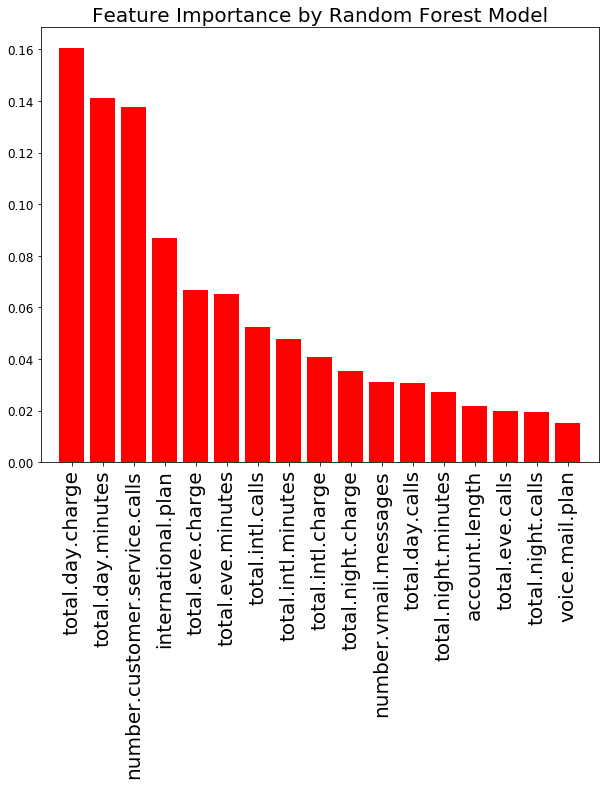

In [62]:
from sklearn.ensemble import RandomForestClassifier

predictors = ['account.length', 
       'international.plan', 'voice.mail.plan', 'number.vmail.messages',
       'total.day.minutes', 'total.day.calls', 'total.day.charge',
       'total.eve.minutes', 'total.eve.calls', 'total.eve.charge',
       'total.night.minutes', 'total.night.calls', 'total.night.charge',
       'total.intl.minutes', 'total.intl.calls', 'total.intl.charge',
       'number.customer.service.calls']
rf = RandomForestClassifier(random_state=1, n_estimators=50,
                            max_depth=9,
                            min_samples_split=6,
                            min_samples_leaf=4, n_jobs=-1)
    
rf.fit(df[predictors],df["churn"])
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
plt.figure(figsize=(10,8))
plt.title("Feature Importance by Random Forest Model", fontsize = 20)
plt.bar(range(np.size(predictors)), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, fontsize = 20, rotation='vertical')
plt.yticks(fontsize = 12)

plt.xlim([-1, np.size(predictors)])
plt.show()

rfc.score(inpfeat_train, label_train)

In [63]:
rfc.score(inpfeat_test,label_test)

0.937888198757764

In [46]:
.92 + (.99 * .05)

0.9695

In [64]:
pd.crosstab(label_test, rfc.predict(inpfeat_test))

col_0,0,1
churn,,
0,561,4
1,36,43


In [65]:
pd.crosstab(label_test, gbc.predict(inpfeat_test))

NameError: name 'gbc' is not defined

In [66]:
rfc.feature_importances_

array([0.04415926, 0.03444385, 0.08714898, 0.01274487, 0.02346977,
       0.1048914 , 0.04273418, 0.10670769, 0.06868207, 0.03324169,
       0.06637046, 0.0410503 , 0.04198364, 0.04337711, 0.04789638,
       0.04547508, 0.05435093, 0.10127233])

In [67]:
gbc = GradientBoostingClassifier(n_estimators=500, max_depth=8,
                                 subsample=0.5, 
                                 max_features='auto',
                                 learning_rate=0.05)
gbc.fit(inpfeat_train, label_train)



#rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='auto')


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
print (gbc.score(inpfeat_train,label_train))
print (gbc.score(inpfeat_test,label_test))

1.0
0.9487577639751553


In [55]:
.05 + .95

1.0

In [70]:
gbc.feature_importances_

array([0.03891365, 0.03560418, 0.06009467, 0.01918132, 0.03105014,
       0.09615485, 0.05349559, 0.09734843, 0.07410007, 0.03982273,
       0.06846643, 0.04521157, 0.04778556, 0.04005658, 0.04282988,
       0.0657999 , 0.05531795, 0.08876648])

In [28]:

# support vector machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(inpfeat_train, label_train)
svm_score_train = svm.score(inpfeat_train, label_train)
svm_score_test = svm.score(inpfeat_test, label_test)
svm_auc_score_train = roc_auc_score(label_train, svm.predict(inpfeat_train))
print (svm_score_train)
print (svm_score_test)

# svm.SVC(kernel='linear')
# svm.fit(inpfeat_train,label_train)

# svm.SVC(kernel='rbf', C=1, gamma = 2**-5)
# svm.fit(inpfeat_train,label_train)

# kernel: We have already discussed about it. Here, we have various options
# available with kernel like, “linear”, “rbf”,”poly” and others (default value is “rbf”).
# Here “rbf” and “poly” are useful for non-linear hyper-plane. Let’s look at the example, where
# we’ve used linear kernel on two feature of iris data set to classify their class.
  
    
# gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma,
# will try to exact fit the as per training data set i.e. generalization error and 
# cause over-fitting problem.

# C: Penalty parameter C of the error term. It also controls the trade off between
# smooth decision boundary and classifying the training points correctly.
# We should always look at the cross validation score to have effective combination of 
# these parameters and avoid over-fitting.

# k-nearest neigbours



1.0
0.8717391304347826


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(inpfeat_train,label_train)
knn_score_train = knn.score(inpfeat_train, label_train)
knn_score_test = knn.score(inpfeat_test, label_test)
knn_auc_score_train = roc_auc_score(label_train, knn.predict(inpfeat_train))
knn_auc_score_test = roc_auc_score(label_test, knn.predict(inpfeat_test))
print (knn_auc_score_train)
print (knn_auc_score_test)    

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
nb = gnb.fit(inpfeat_train, label_train)
y_pred = nb.predict(inpfeat_test) # Chained FIT and PRED
#y_pred = nb.fit(inpfeat_train, label_train).predict(inpfeat_train) # Chained FIT and PRED
print (nb.score(inpfeat_train,label_train))
print (nb.score(inpfeat_test,label_test))
print (y_pred)
#print("Number of mislabeled points out of a total %d points : %d" % (inpfeat_train.shape[0],(label_train != y_pred).sum()))
# summarize the fit of the model
from sklearn.metrics import classification_report
#print(classification_report(label_test,y_pred_class)) 
# Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
print(metrics.classification_report(label_test, y_pred))
print(metrics.confusion_matrix(label_test, y_pred))

0.8615942028985507
0.8652173913043478
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
             precision    re

In [48]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression()
log1.fit(inpfeat_train,label_train)

from sklearn import linear_model as lm
# data processing
scaler = preprocessing.StandardScaler().fit(inpfeat_train)
X_train_scaled = scaler.transform(inpfeat_train)
X_test_scaled = scaler.transform(inpfeat_test)
'''
alphas = [0.1,0.5,1,5,10]
for i in alphas:
    model = lm.RidgeClassifier(alpha=i)
    fitted = model.fit(X_train_scaled,inpfeat_train)
    print('Ridge Regression score for training set: %f' % fitted.score(X_train_scaled, inpfeat_train))
    print("Alpha value:",i)
    y_true, y_pred = y_test, fit.predict(X_test_scaled)
    print(classification_report(y_true, y_pred))
'''

'\nalphas = [0.1,0.5,1,5,10]\nfor i in alphas:\n    model = lm.RidgeClassifier(alpha=i)\n    fitted = model.fit(X_train_scaled,inpfeat_train)\n    print(\'Ridge Regression score for training set: %f\' % fitted.score(X_train_scaled, inpfeat_train))\n    print("Alpha value:",i)\n    y_true, y_pred = y_test, fit.predict(X_test_scaled)\n    print(classification_report(y_true, y_pred))\n'

## HYPER PARAMETER TUNING

- Machine learning algorithms tend to be known as black box algorithms. There are inputs (our features, independent variables) and outputs (our dependant variable/s).


- There is not a huge amount of control over what happens underneath the hood of these algorithms. However, there is still some model parameters that can be controlled and tuned by the practitioner. These are known as hyperparameters, and in some models (such as SVMs) can drastically affect model performance.



In [24]:

# with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core.
# In linux with 4 cores I can clearly see the cpu usage:(100%,~5%, ~5%, ~5%) when I run n_jobs=1
# and (100%, 100%, 100%, 100%) when running with n_jobs=-1. 

# Each process takes the 100% usage of a given core, but if you have n_jobs=1 only one core is used.
# – Imanol Luengo Sep 25 '15 at 13:26 

rf_grid = {
    'max_depth': [4, 8, None],
    'max_features': ['sqrt', 'log2', None],
    # 'min_samples_split': [1, 2, 4],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True], # Mandatory with oob_score=True
    'n_estimators': [50, 100, 200, 400],
    'random_state': [67],
    'oob_score': [True],
    'n_jobs': [-1]
    }
# b0 b1 parameters
# 

In [25]:
from sklearn.model_selection import GridSearchCV
# with n_jobs=1 it uses 100% of the cpu of one of the cores. Each process is run in a different core.
# In linux with 4 cores I can clearly see the cpu usage:(100%,~5%, ~5%, ~5%) when I run n_jobs=1
# and (100%, 100%, 100%, 100%) when running with n_jobs=-1. 

# Each process takes the 100% usage of a given core, but if you have n_jobs=1 only one core is used.
# – Imanol Luengo Sep 25 '15 at 13:26 
    
rf_grid_cv = GridSearchCV(RandomForestClassifier(),
                             rf_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='roc_auc')
rf_grid_cv.fit(inpfeat_train, label_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, None], 'max_features': ['sqrt', 'log2', None], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True], 'n_estimators': [50, 100, 200, 400], 'random_state': [67], 'oob_score': [True], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [29]:
rcv_fit=rf_grid_cv.fit(inpfeat_train, label_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.4min finished


In [38]:

pd.DataFrame(rf_grid_cv.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\home\Anaconda367\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\home\Anaconda367\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\home\Anaconda367\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\home\Anaconda367\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,param_n_jobs,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
67,2.736823,0.248603,0.475694,0.205267,True,8,None,2,400,-1,...,0.909759,0.867924,0.900970,0.024157,1,0.991896,0.990558,0.993483,0.991979,0.001195
66,1.510753,0.086970,0.395689,0.160965,True,8,None,2,200,-1,...,0.910415,0.863771,0.900905,0.027223,2,0.992467,0.990359,0.993462,0.992096,0.001294
70,1.396413,0.171171,0.297017,0.136098,True,8,None,4,200,-1,...,0.907646,0.864873,0.900654,0.026764,3,0.985516,0.986865,0.987940,0.986774,0.000992
71,3.299189,0.346577,0.418024,0.281588,True,8,None,4,400,-1,...,0.904983,0.866525,0.900635,0.026200,4,0.985146,0.986425,0.987929,0.986500,0.001138
60,0.323019,0.066140,0.149675,0.031480,True,8,None,1,50,-1,...,0.921003,0.857733,0.900537,0.030226,5,0.995429,0.991460,0.994950,0.993946,0.001769


In [26]:
rf_grid_cv.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': None,
 'min_samples_leaf': 2,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 67}

In [37]:
rf_grid_cv.best_score_

0.9009544042486277

In [27]:
best_model = rf_grid_cv.best_estimator_
print (best_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=True, random_state=67, verbose=0, warm_start=False)


In [42]:
best_model.oob_score_

0.9355072463768116

In [ ]:
# fit time
start = time.time()
end=time.time()
elapsed_time = (end-start)
# predict  timef


start = time.time()
end=time.time()
elapsed_time = (end-start)


In [45]:
def plot_confusion_matrix(model, X_test, y_true):
    '''Code stolen brazenly from sklearn example.'''
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

[[398   3]
 [ 23  36]]


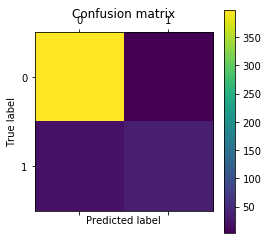

In [46]:
plot_confusion_matrix(best_model, inpfeat_test, label_test)

## Fitting a Neural Network 

In [35]:
#max_iter : int, optional, default 200
# The solver for weight optimization.

# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
# ‘sgd’ refers to stochastic gradient descent.
# ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

#Maximum number of iterations. The solver iterates until convergence 
# (determined by ‘tol’) or this number of iterations. For stochastic solvers 
# (‘sgd’, ‘adam’), note that this determines the number of epochs (
# how many times each data point will be used), not the number of gradient steps.
# alpha - L2 penalty (regularization term) parameter - default 0.0001

# MLP trains using Backpropagation. More precisely, it trains using some form of 
# gradient descent and the gradients are calculated using Backpropagation. 

clf = neural_network.MLPClassifier(alpha=0.1, hidden_layer_sizes=(6), max_iter=500, random_state=3, solver='lbfgs')
clf.fit(x, y.values.ravel())


MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=6, learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=3, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [ ]:
preds = clf.predict(inpfeat_test)
sub = pd.DataFrame(preds)
sub

In [ ]:
best_model.predict(inpfeat_train)

In [19]:

parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':np.arange(5, 12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)



In [100]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [20]:
clf_grid.fit(x,y.values.ravel())
#clf_grid_hair_soul.fit(x_hair_soul,y.values.ravel())

GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'solver': ['lbfgs'], 'max_iter': [500, 1000, 1500], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11]), 'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [48]:
print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)
print("-----------------Added features --------------")
print("Best score: %0.4f" % clf_grid_churn.)best_score_
print("Using the following parameters:")
print(clf_grid.best_params_)
print("------------------------------------------------------")

-----------------Original Features--------------------
Best score: 0.8788
Using the following parameters:
{'alpha': 0.10000000000000001, 'solver': 'lbfgs', 'max_iter': 1500, 'random_state': 0, 'hidden_layer_sizes': 11}
-----------------Added features --------------
Best score: 0.8788
Using the following parameters:
{'alpha': 0.10000000000000001, 'solver': 'lbfgs', 'max_iter': 1500, 'random_state': 0, 'hidden_layer_sizes': 11}
------------------------------------------------------


In [ ]:
clf_grid_churn.fit(x,y.values.ravel())

## fit model on training data

In [31]:
# fit model no training data
from sklearn import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
model = XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=300,n_jobs=-1)
model.fit(inpfeat_train, label_train)
# make predictions for test data
y_pred = model.predict(inpfeat_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ImportError: cannot import name 'XGBClassifier'

## xgboost classifier

In [74]:
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier #For Classification
from sklearn.ensemble import GradientBoostingRegressor #For Regression

In [75]:
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
xgb.fit(inpfeat_train, label_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [76]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
   subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

NameError: name 'GridSearchCV' is not defined

In [10]:
from xgboost.sklearn import XGBClassifier

In [11]:
# fit model no training data
model = XGBClassifier()
model.fit(inpfeat_train, label_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [ ]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

In [13]:
# make predictions for test data
y_pred = model.predict(inpfeat_test)
predictions = [round(value) for value in y_pred]

C:\Users\home\Anaconda369\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
# evaluate predictions
# accuracy = accuracy_score(inpfeat_test, model.predict(inpfeat_test))
trainaccuracy=accuracy_score(label_train,model.predict(inpfeat_train).astype(int))
print("Accuracy: %.2f%%" % (trainaccuracy * 100.0))
accuracy=accuracy_score(label_test,model.predict(inpfeat_test).astype(int))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.88%
Accuracy: 94.13%


C:\Users\home\Anaconda369\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\home\Anaconda369\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [82]:
inpfeat_train.shape

(1380, 18)

## Fitting neural network in Keras 

In [89]:
# pip install tensorflow 
# pip install keras
#print keras.__version__

In [90]:
# import the Sequential model type from Keras. This is simply a linear stack of neural network layers,
# and it's perfect for the type of feed-forward CNN 

In [71]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.optimizers import SGD
import numpy as np

In [72]:
inpfeat_train.shape

(1196, 18)

In [73]:
model = Sequential()
model.add(Dense(18, input_dim=inpfeat_train.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 503
Trainable params: 503
Non-trainable params: 0
_________________________________________________________________


In [75]:
sgd = SGD(lr=0.1)

In [79]:
# binary_crossentropy this how we will calcuate the error of our model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [82]:
# Fitting the model for 100 epochs with 10 as batch size
model.fit(inpfeat_train, label_train, epochs=100, batch_size=4)

Epoch 1/100


IndexError: indices are out-of-bounds

In [81]:
 accuracy = model.evaluate(inpfeat_test, label_test)

IndexError: indices are out-of-bounds

In [94]:
accuracy

[0.3848422465117081, 0.8717391309530839]

In [100]:
bho = model.get_weights()

In [101]:
bho

[array([[ 0.26154104, -0.09971348, -0.35608175,  0.30295432, -0.3904066 ,
          0.00073785, -0.08752801, -0.38183597,  0.03423408,  0.20212543,
          0.21953079,  0.22072867, -0.032334  , -0.02307153, -0.36186308,
          0.2527189 ],
        [ 0.12664261,  0.2655366 ,  0.00698191, -0.14684205,  0.2996977 ,
         -0.22283362,  0.32500392,  0.26638332,  0.32174   ,  0.28779775,
          0.32001218, -0.22442794,  0.41985646,  0.43690282,  0.18903476,
          0.2973368 ],
        [ 0.16632424, -0.19221166,  0.2711135 , -0.24934337, -0.05499577,
          0.33392325, -0.33187014,  0.11714684, -0.37724718, -0.39932922,
          0.10267343, -0.19786723,  0.34048757, -0.40938956, -0.40975082,
         -0.42109463],
        [-0.32353467, -0.26095903, -0.2093156 ,  0.22467516,  0.11094302,
         -0.14837846, -0.13780303, -0.24136704, -0.30371597, -0.41758   ,
         -0.24920975, -0.2220199 ,  0.2940981 , -0.34941718,  0.41626924,
         -0.16449812],
        [-0.4053915 

In [68]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [69]:
model.fit(inpfeat_train, label_train, epochs=100, batch_size=10)

Epoch 1/100
1380/1380 [==============================] - 1s 381us/step - loss: 2.0790 - acc: 0.8710
Epoch 2/100
1380/1380 [==============================] - 0s 123us/step - loss: 2.0790 - acc: 0.8710
Epoch 3/100
1380/1380 [==============================] - 0s 143us/step - loss: 2.0790 - acc: 0.8710
Epoch 4/100
1380/1380 [==============================] - 0s 166us/step - loss: 2.0790 - acc: 0.8710
Epoch 5/100
1380/1380 [==============================] - 0s 158us/step - loss: 2.0790 - acc: 0.8710
Epoch 6/100
1380/1380 [==============================] - 0s 129us/step - loss: 2.0790 - acc: 0.8710
Epoch 7/100
1380/1380 [==============================] - 0s 128us/step - loss: 2.0790 - acc: 0.8710
Epoch 8/100
1380/1380 [==============================] - 0s 125us/step - loss: 2.0790 - acc: 0.8710
Epoch 9/100
1380/1380 [==============================] - 0s 133us/step - loss: 2.0790 - acc: 0.8710
Epoch 10/100
1380/1380 [==============================] - 0s 117us/step - loss: 2.0790 - acc: 0.8710

In [20]:
train_accuracy = model.evaluate(inpfeat_train, label_train)
test_accuracy = model.evaluate(inpfeat_test, label_test)
print ('trian accuracy' , train_accuracy)
print ('test accuracy', test_accuracy)

460/460 [==============================] - 0s 28us/step
trian accuracy [0.3860594953099887, 0.8710144927536232]
test accuracy [0.3845584550629491, 0.8717391309530839]


In [21]:
pred = model.predict(inpfeat_test)

In [20]:
y.shape

(1840,)